<a href="https://colab.research.google.com/github/MasapalliHarshitha/Data-Analysis-on-Layoffs-2024/blob/main/Data_Analysis_on_Layoffs_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install countryinfo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import countryinfo

In [ ]:
def get_continent(country):
    try:
        country_info = countryinfo.CountryInfo(country)
        return country_info.region()
    except KeyError:
        return "Unknown"

In [ ]:
data = pd.read_csv('layoffs_data.csv', parse_dates=['Date', 'Date_Added'])
data2 = data
data.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown


In [ ]:
data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Company                     3642 non-null   object        
 1   Location_HQ                 3642 non-null   object        
 2   Industry                    3642 non-null   object        
 3   Laid_Off_Count              2389 non-null   float64       
 4   Date                        3642 non-null   datetime64[ns]
 5   Source                      3642 non-null   object        
 6   Funds_Raised                3252 non-null   float64       
 7   Stage                       3642 non-null   object        
 8   Date_Added                  3642 non-null   datetime64[ns]
 9   Country                     3642 non-null   object        
 10  Percentage                  2342 non-null   float64       
 11  List_of_Employees_Laid_Off  3642 non-null   object      

In [ ]:
data['Continent'] = data['Country'].apply(get_continent)
data.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,Continent
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown,Europe
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown,Asia
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown,Asia
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown,Americas
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown,Americas


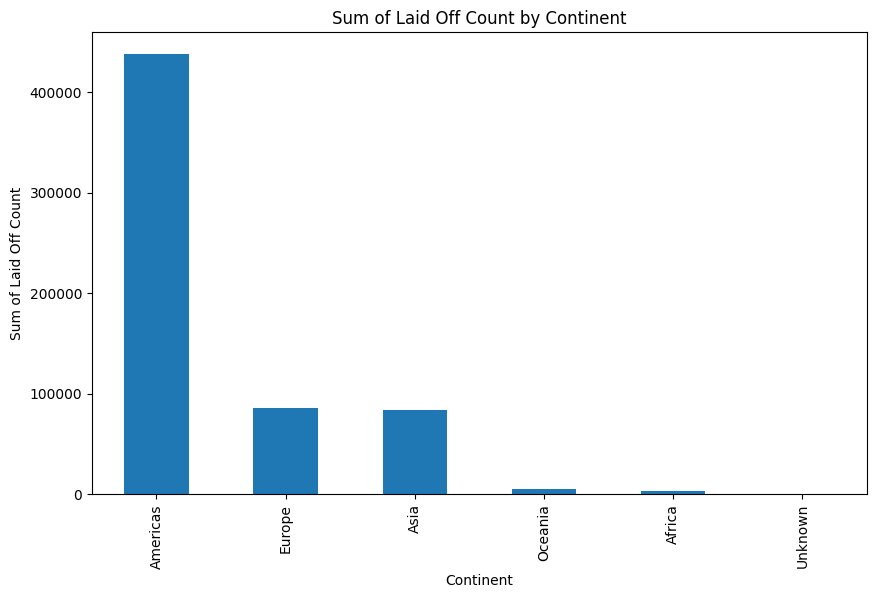

In [ ]:
continent_sums = data.groupby('Continent')['Laid_Off_Count'].sum().sort_values(ascending=False)

# Draw a bar chart to compare
plt.figure(figsize=(10, 6))
continent_sums.plot(kind='bar')
plt.title('Sum of Laid Off Count by Continent')
plt.xlabel('Continent')
plt.ylabel('Sum of Laid Off Count')
plt.show()

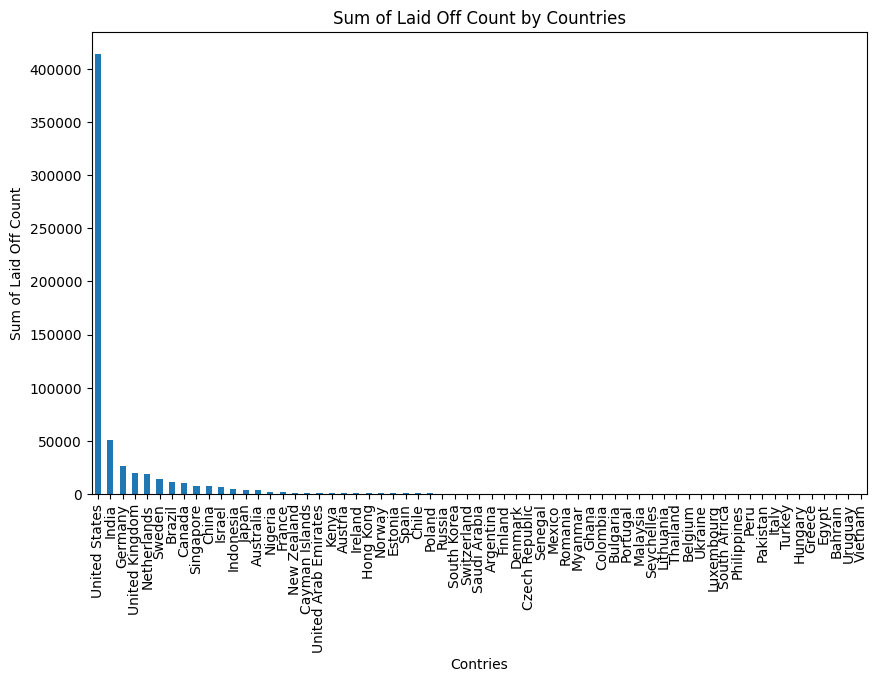

In [ ]:
country_sums = data.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
country_sums.plot(kind='bar')
plt.title('Sum of Laid Off Count by Countries')
plt.xlabel('Contries')
plt.ylabel('Sum of Laid Off Count')
plt.show()

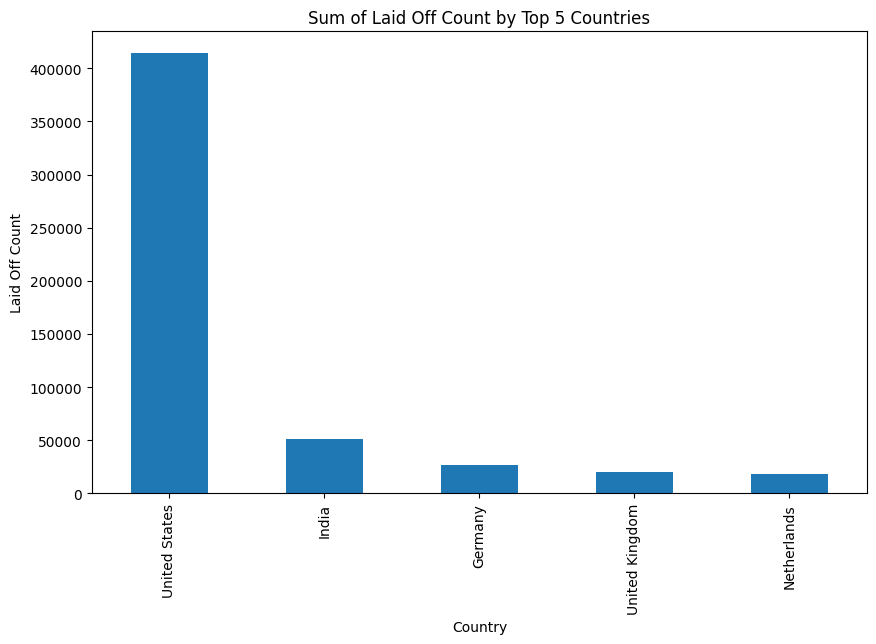

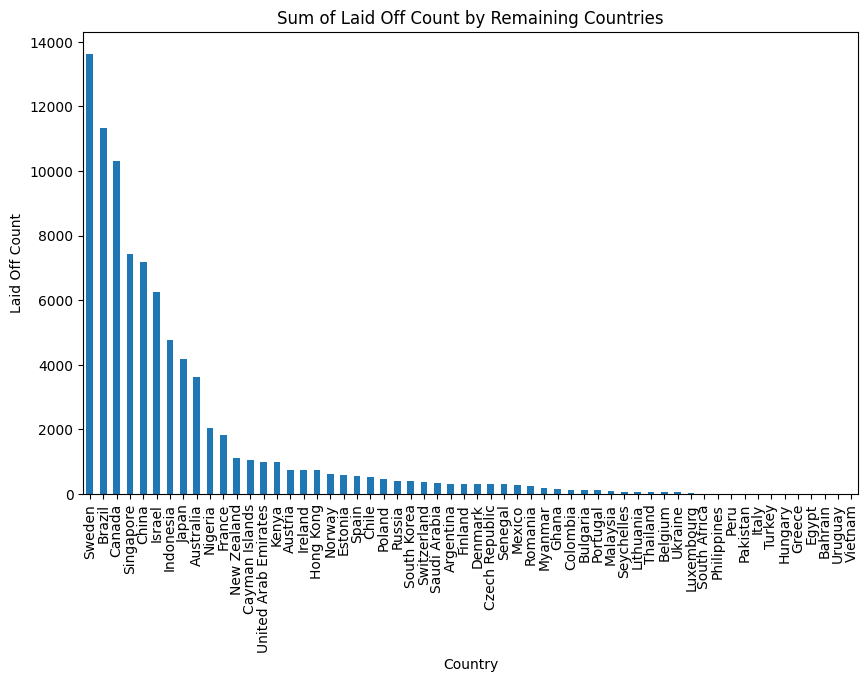

In [ ]:
country_sums = data.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)
top_5_countries = country_sums.head(5)

plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='bar')
plt.title('Sum of Laid Off Count by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Laid Off Count')
plt.show()

plt.figure(figsize=(10, 6))
remaining_countries = country_sums.iloc[5:]
remaining_countries.plot(kind='bar')
plt.title('Sum of Laid Off Count by Remaining Countries')
plt.xlabel('Country')
plt.ylabel('Laid Off Count')
plt.show()

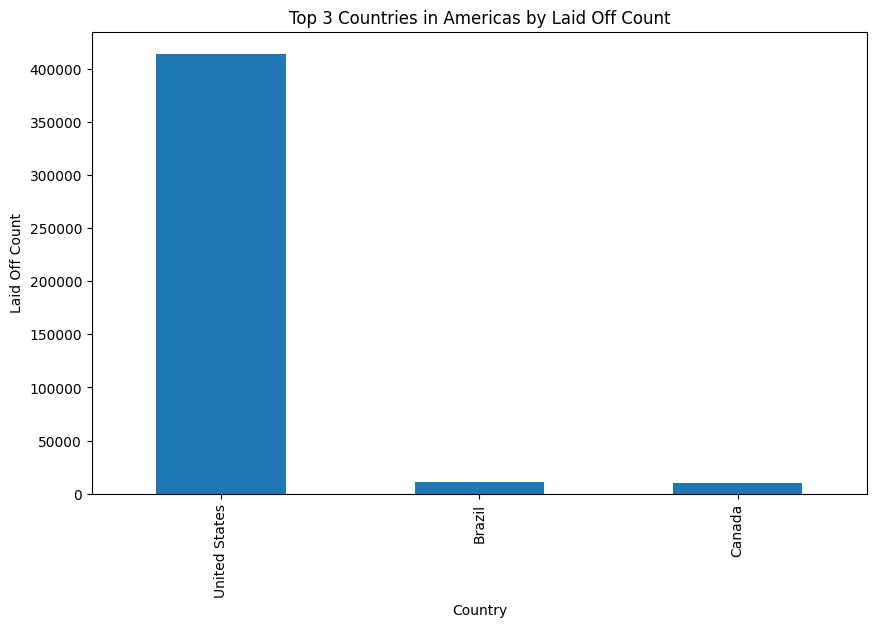

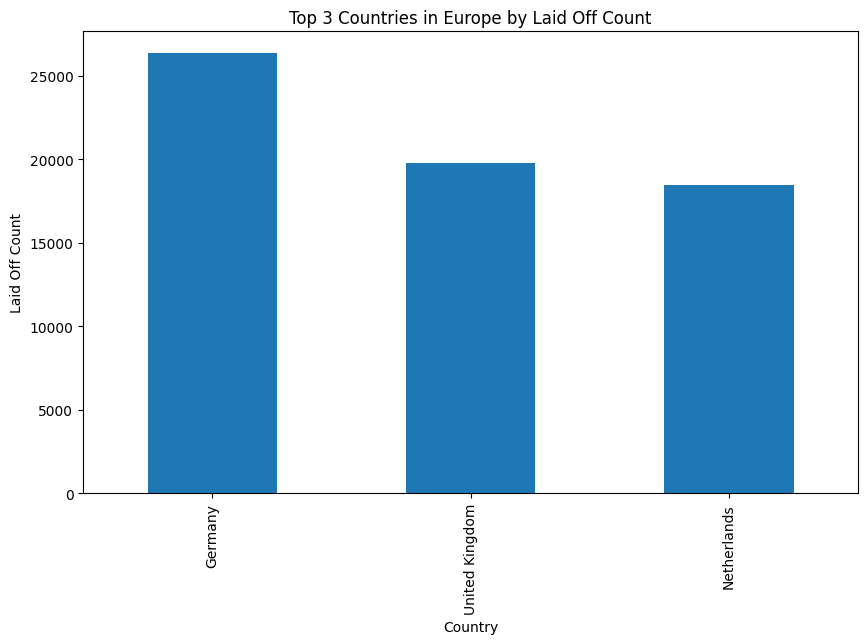

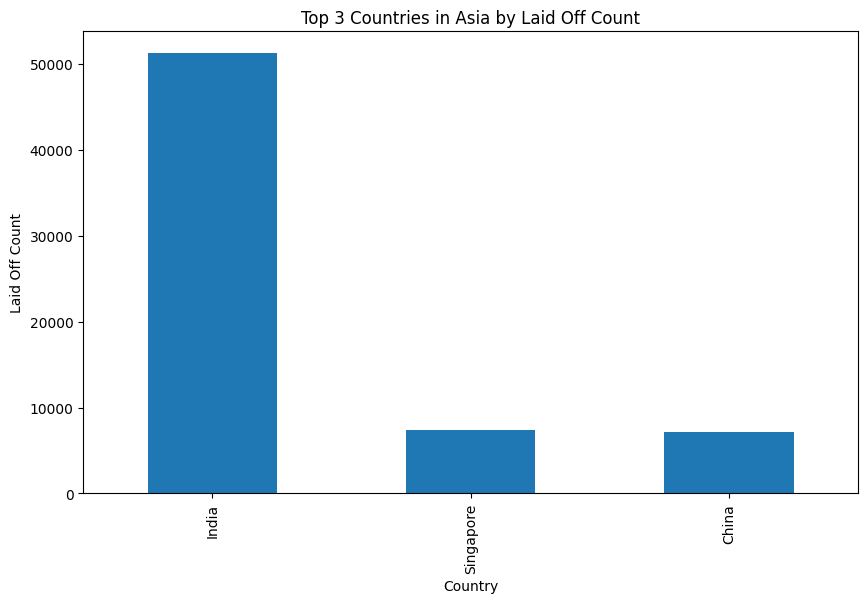

In [ ]:
asia_data = data[data['Continent'] == 'Americas']
asia_country_sums = asia_data.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)
top_3_asia_countries = asia_country_sums.head(3)

plt.figure(figsize=(10, 6))
top_3_asia_countries.plot(kind='bar')
plt.title('Top 3 Countries in Americas by Laid Off Count')
plt.xlabel('Country')
plt.ylabel('Laid Off Count')
plt.show()

asia_data = data[data['Continent'] == 'Europe']
asia_country_sums = asia_data.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)
top_3_asia_countries = asia_country_sums.head(3)

plt.figure(figsize=(10, 6))
top_3_asia_countries.plot(kind='bar')
plt.title('Top 3 Countries in Europe by Laid Off Count')
plt.xlabel('Country')
plt.ylabel('Laid Off Count')
plt.show()

asia_data = data[data['Continent'] == 'Asia']
asia_country_sums = asia_data.groupby('Country')['Laid_Off_Count'].sum().sort_values(ascending=False)
top_3_asia_countries = asia_country_sums.head(3)

plt.figure(figsize=(10, 6))
top_3_asia_countries.plot(kind='bar')
plt.title('Top 3 Countries in Asia by Laid Off Count')
plt.xlabel('Country')
plt.ylabel('Laid Off Count')
plt.show()

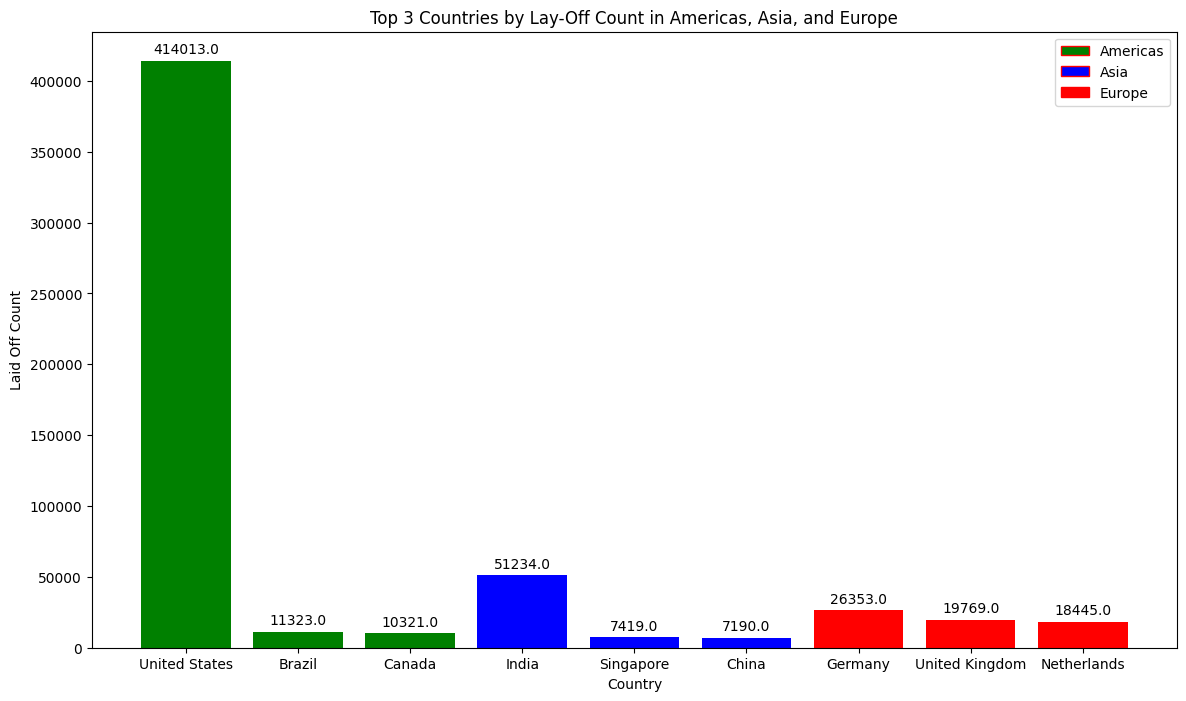

In [ ]:
# Aggregate the data by country and continent
country_data = data.groupby(['Country', 'Continent'])['Laid_Off_Count'].sum().reset_index()

# Top countries by lay-off count for each continent
top_americas = country_data[country_data['Continent'] == 'Americas'].nlargest(3, 'Laid_Off_Count')
top_asia = country_data[country_data['Continent'] == 'Asia'].nlargest(3, 'Laid_Off_Count')
top_europe = country_data[country_data['Continent'] == 'Europe'].nlargest(3, 'Laid_Off_Count')

# Combine the top countries
top_countries = pd.concat([top_americas, top_asia, top_europe])

# Set color for each continent
colors = ['green' if continent == 'Americas' else 'blue' if continent == 'Asia' else 'red' for continent in top_countries['Continent']]

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(top_countries['Country'], top_countries['Laid_Off_Count'], color=colors)

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Laid Off Count')
ax.set_title('Top 3 Countries by Lay-Off Count in Americas, Asia, and Europe')

# Add the colors legend manually
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', edgecolor='r', label='Americas'),
    Patch(facecolor='blue', edgecolor='r', label='Asia'),
    Patch(facecolor='red', edgecolor='r', label='Europe')
]
ax.legend(handles=legend_elements, loc='upper right')

# Annotate the bars with the lay-off count
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

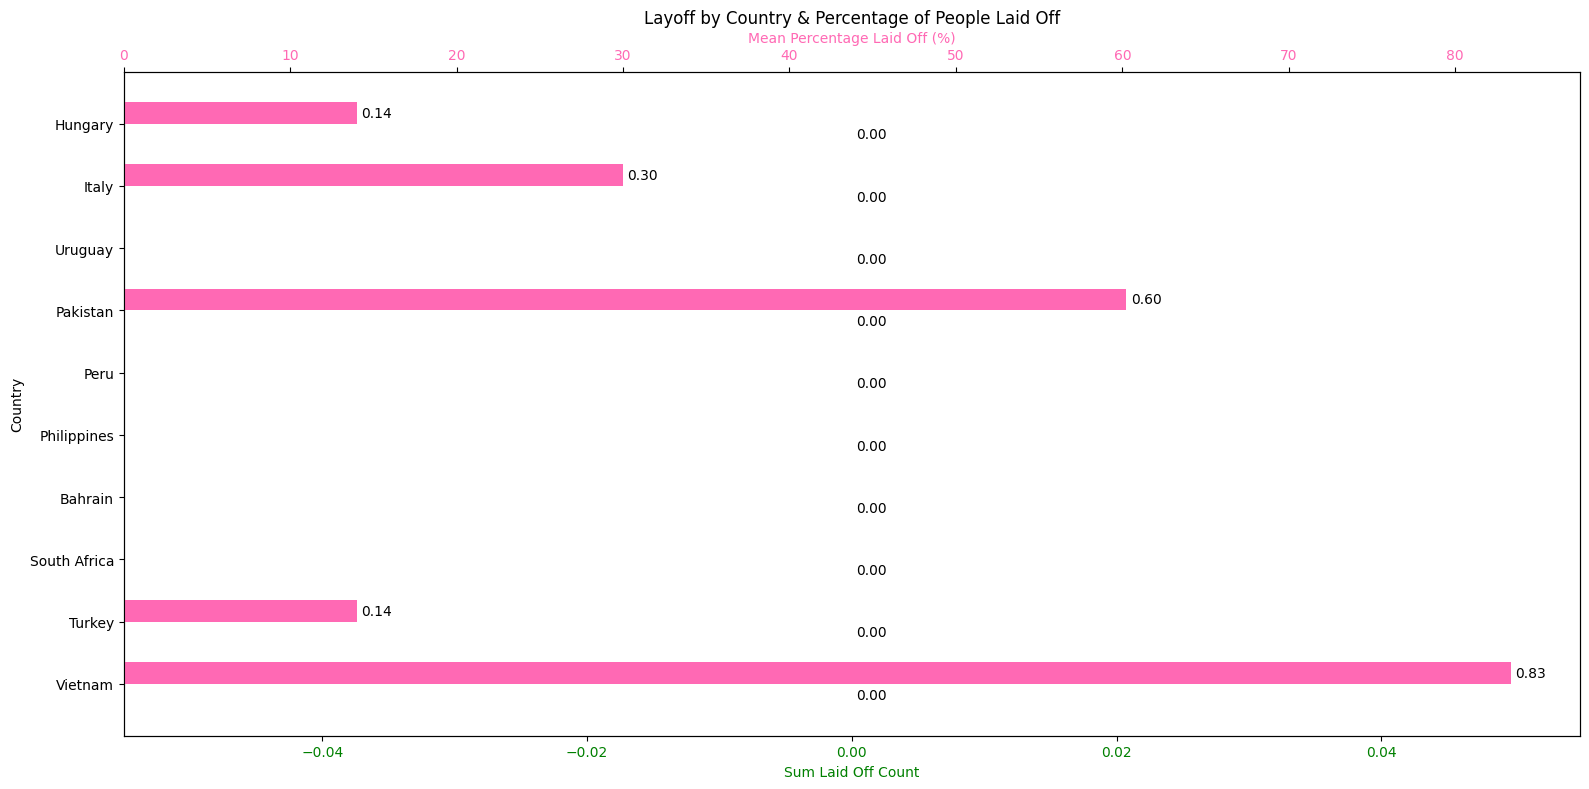

In [ ]:
country_data = data.groupby('Country').agg({
    'Laid_Off_Count': 'sum',
    'Percentage': 'mean'
}).reset_index()

# Sort by Laid_Off_Count and get the top 10 countries
top_10_countries = country_data.sort_values(by='Laid_Off_Count', ascending=True).head(10)

# Prepare data for the grouped bar chart
labels = top_10_countries['Country']
laid_off_counts = top_10_countries['Laid_Off_Count']
percentages = top_10_countries['Percentage']

y = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot Laid Off Count on primary y-axis
rects1 = ax1.barh(y - width/2, laid_off_counts, width, label='Laid Off Count', color='green')
ax1.set_ylabel('Country')
ax1.set_xlabel('Sum Laid Off Count', color='green')
ax1.tick_params(axis='x', labelcolor='green')

# Create secondary x-axis for Percentage
ax2 = ax1.twiny()
rects2 = ax2.barh(y + width/2, percentages * 100, width, label='Percentage Laid Off', color='hotpink')
ax2.set_xlabel('Mean Percentage Laid Off (%)', color='hotpink')
ax2.tick_params(axis='x', labelcolor='hotpink')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax1.set_title('Layoff by Country & Percentage of People Laid Off')
ax1.set_yticks(y)
ax1.set_yticklabels(labels)
fig.tight_layout()

# Function to add labels on the bars
def autolabel(rects, ax, scale=1):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width/scale:.2f}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

autolabel(rects1, ax1, scale=1)
autolabel(rects2, ax2, scale=100)

fig.tight_layout()  # Adjust layout to make room for the x-labels

plt.show()

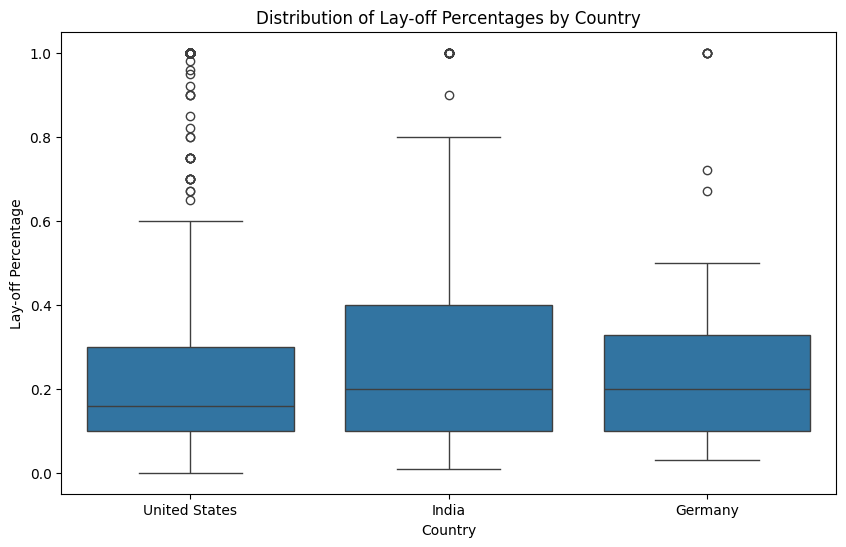

In [ ]:
# Filter data for specified countries
countries_of_interest = ['United States', 'India', 'Germany']
filtered_data = data[data['Country'].isin(countries_of_interest)]

# Drop rows with NaN values in 'Percentage' column
filtered_data = filtered_data.dropna(subset=['Percentage'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='Country', y='Percentage', data=filtered_data)

# Add titles and labels
plt.title('Distribution of Lay-off Percentages by Country')
plt.xlabel('Country')
plt.ylabel('Lay-off Percentage')

# Show the plot
plt.show()

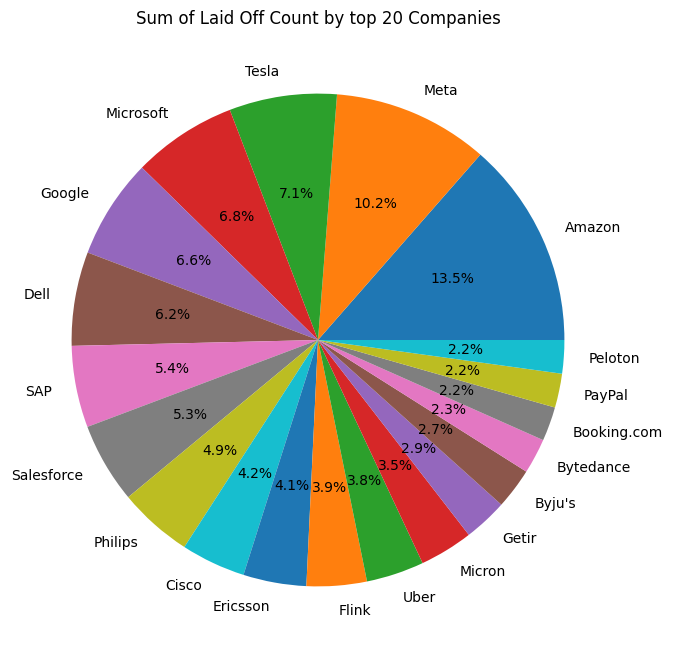

In [ ]:
company_data = data.groupby('Company')['Laid_Off_Count'].sum().reset_index()
company_data = company_data.sort_values('Laid_Off_Count', ascending=False).head(20)

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(company_data['Laid_Off_Count'], labels=company_data['Company'], autopct='%1.1f%%')
plt.title('Sum of Laid Off Count by top 20 Companies')
plt.show()

In [ ]:
country_layoffs = data.groupby('Country')['Laid_Off_Count'].sum().reset_index()

# "Draw a heatmap"
fig = px.choropleth(country_layoffs,
                    locations="Country",
                    locationmode='country names',
                    color="Laid_Off_Count",
                    hover_name="Country",
                    color_continuous_scale=[
                        (0.0, "rgb(255, 255, 204)"), # "Light yellow"
                        (0.33, "rgb(255, 204, 102)"), # "Yellow-orange"
                        (0.66, "rgb(255, 102, 102)"), # "Red-orange"
                        (1.0, "rgb(204, 0, 0)")       #"Dark red"
                    ],
                    title='Heat Map of Layoffs by Country')

fig.update_geos(projection_type="natural earth")

fig.show()

In [ ]:
location_layoffs = data.groupby('Location_HQ')['Laid_Off_Count'].sum().reset_index()

# "Get the top 10 regions with the highest number of layoffs"
top_10_locations = location_layoffs.nlargest(10, 'Laid_Off_Count')

# "Draw a bar chart"
fig = px.bar(top_10_locations,
             x='Location_HQ',
             y='Laid_Off_Count',
             title="Top 10 Regions with the Highest Number of Layoffs",
             labels={'Location_HQ': 'Region', 'Laid_Off_Count': "Number of Layoffs"},
             color='Laid_Off_Count',
             color_continuous_scale=px.colors.sequential.Plasma)

# Customize chart interface
fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

<ipython-input-28-ba8e16ec6d3c>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




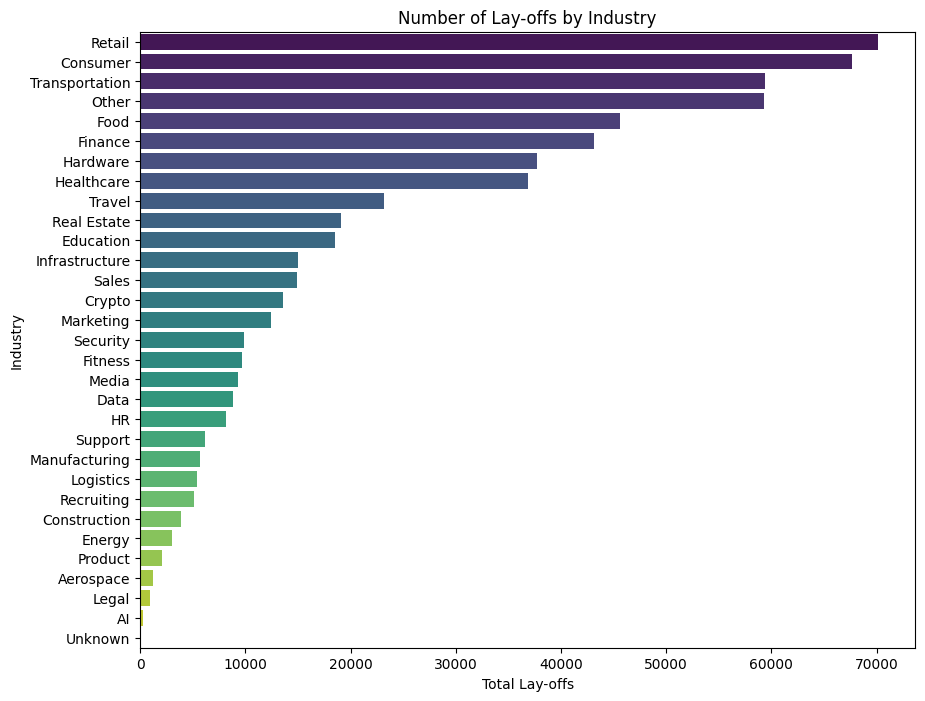

In [ ]:
cleaned_data = data.dropna(subset=['Laid_Off_Count'])

industry_layoffs = cleaned_data.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=False)

# Draw a chart
plt.figure(figsize=(10, 8))
sns.barplot(x=industry_layoffs.values, y=industry_layoffs.index, palette='viridis')
plt.title('Number of Lay-offs by Industry')
plt.xlabel('Total Lay-offs')
plt.ylabel('Industry')
plt.show()

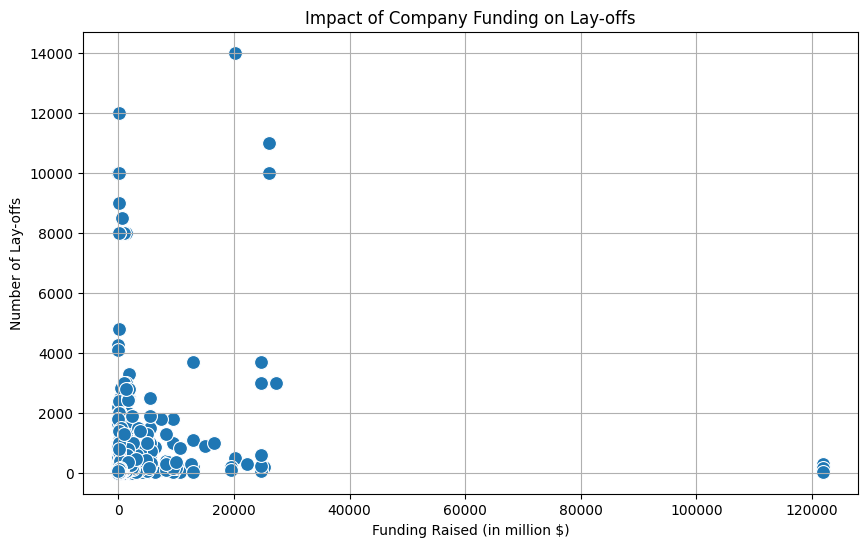

In [ ]:
cleaned_data = data2.dropna(subset=['Funds_Raised', 'Laid_Off_Count'])

# "Create a scatter plot to analyze the relationship between the amount of funding raised and the number of employees laid off."
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Funds_Raised', y='Laid_Off_Count', data=cleaned_data, s=100)
plt.title('Impact of Company Funding on Lay-offs')
plt.xlabel('Funding Raised (in million $)')
plt.ylabel('Number of Lay-offs')
plt.grid(True)
plt.show()

<ipython-input-30-346359e72f40>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




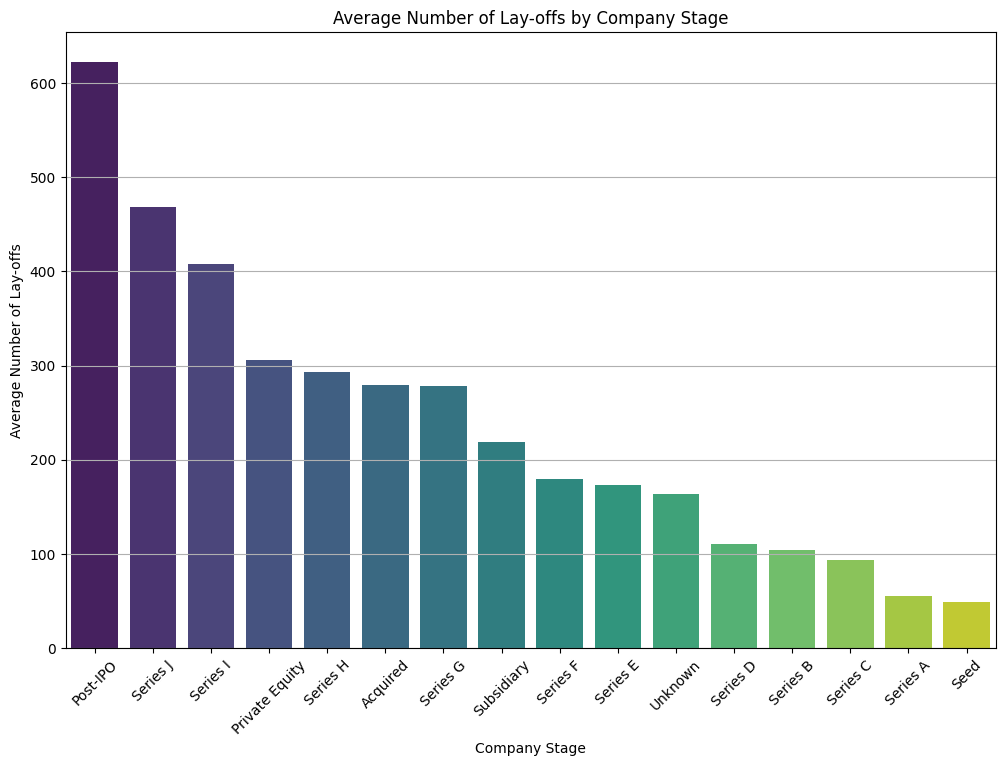

In [ ]:
cleaned_data = data2.dropna(subset=['Laid_Off_Count', 'Stage'])

average_layoffs_by_stage = cleaned_data.groupby('Stage')['Laid_Off_Count'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=average_layoffs_by_stage.index, y=average_layoffs_by_stage.values, palette='viridis')
plt.title('Average Number of Lay-offs by Company Stage')
plt.xlabel('Company Stage')
plt.ylabel('Average Number of Lay-offs')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True, axis='y')  # Display vertical grid lines for the y-axis
plt.show()

In [ ]:
layoff_count = pd.DataFrame(data, columns=['Laid_Off_Count', 'Date'])
layoff_count.head()

,Laid_Off_Count,Date
0,150.0,2024-06-05
1,100.0,2024-06-05
2,30.0,2024-06-05
3,30.0,2024-06-05
4,NaN,2024-06-05


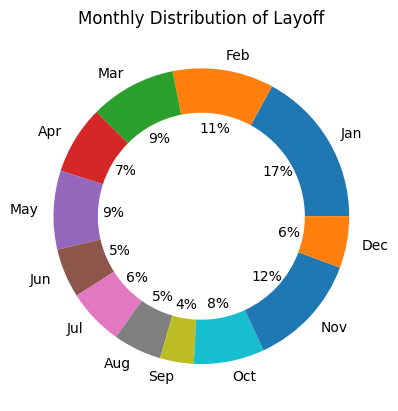

In [ ]:
avg_monthly_layoff = layoff_count.groupby(layoff_count['Date'].dt.month).mean()
avg_monthly_layoff['Date'] = avg_monthly_layoff.index
avg_monthly_layoff['Date'] = pd.to_datetime(avg_monthly_layoff['Date'], format='%m').dt.strftime('%b')
avg_monthly_layoff = avg_monthly_layoff.reset_index(drop=True)

fig, ax = plt.subplots()

# highest_layoff = avg_monthly_layoff.idxmax().Laid_Off_Count
# explode = np.empty(12)
# explode[highest_layoff] = 0.1

ax.pie(avg_monthly_layoff['Laid_Off_Count'], labels=avg_monthly_layoff['Date'], autopct='%.0f%%', wedgeprops=dict(width=0.3))
ax.set_title('Monthly Distribution of Layoff')

plt.show()

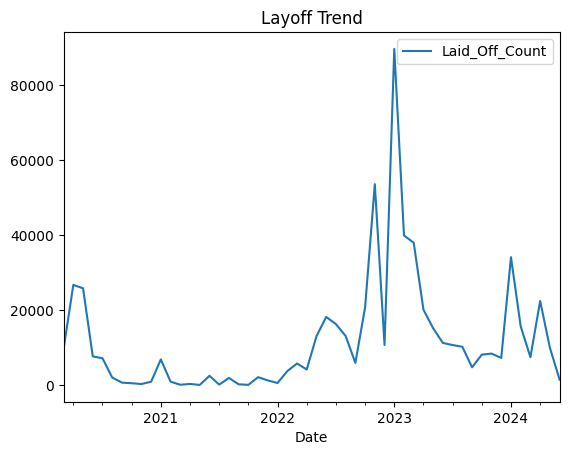

In [ ]:
monthly_layoff = layoff_count.resample('ME', on='Date').sum()
monthly_layoff['Date'] = monthly_layoff.index #.strftime('%B %Y')
monthly_layoff = monthly_layoff.reset_index(drop=True)

monthly_layoff.plot(title="Layoff Trend", x='Date', y='Laid_Off_Count')
plt.show()

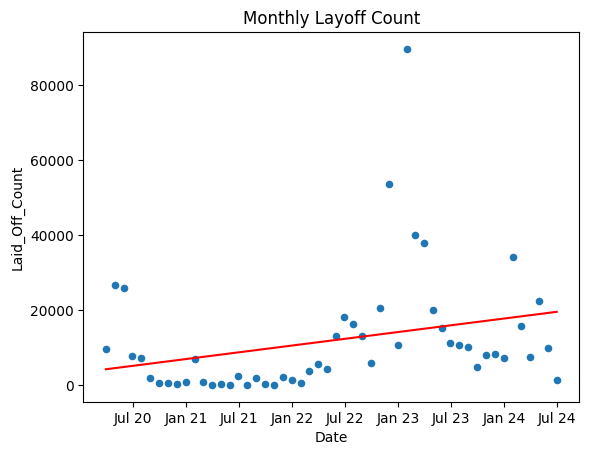

In [ ]:
ax = monthly_layoff.plot(kind='scatter', x='Date', y='Laid_Off_Count', title='Monthly Layoff Count')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

x = mdates.date2num(monthly_layoff['Date'])
z = np.polyfit(x, monthly_layoff['Laid_Off_Count'], 1)
p = np.poly1d(z)
ax.plot(x, p(x), color="red")

plt.show()

In [ ]:
all_postings = pd.read_csv('aggregate_job_postings_US.csv', parse_dates=['date'])
all_postings = all_postings.drop(columns=['variable', 'jobcountry'])
all_postings.head()

,date,indeed_job_postings_index_SA,indeed_job_postings_index_NSA
0,2020-02-01,100.00,100.00
1,2020-02-02,99.98,100.06
2,2020-02-03,99.97,100.09
3,2020-02-04,100.03,100.18
4,2020-02-05,100.12,100.29


In [ ]:
all_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3388 entries, 0 to 3387
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           3388 non-null   datetime64[ns]
 1   indeed_job_postings_index_SA   3388 non-null   float64       
 2   indeed_job_postings_index_NSA  3388 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 79.5 KB


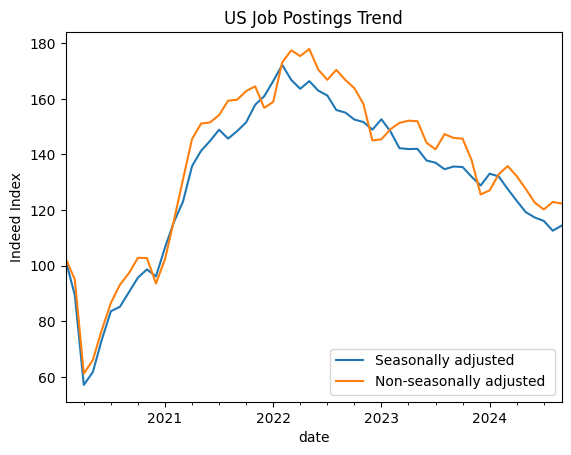

In [ ]:
monthly_all = all_postings.resample('ME', on='date').mean()
monthly_all.plot(title="US Job Postings Trend", ylabel = 'Indeed Index')
plt.legend(["Seasonally adjusted ", "Non-seasonally adjusted "]);
plt.show()

In [ ]:
sectors_postings = pd.read_csv('job_postings_by_sector_US.csv', parse_dates=['date'])
sectors_postings = sectors_postings.drop(columns=['variable', 'jobcountry'])
sectors_postings.head()

,date,indeed_job_postings_index,display_name
0,2020-02-01,100.00,Accounting
1,2020-02-02,99.85,Accounting
2,2020-02-03,99.68,Accounting
3,2020-02-04,99.53,Accounting
4,2020-02-05,99.49,Accounting


In [ ]:
sectors_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77924 entries, 0 to 77923
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       77924 non-null  datetime64[ns]
 1   indeed_job_postings_index  77924 non-null  float64       
 2   display_name               77924 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.8+ MB


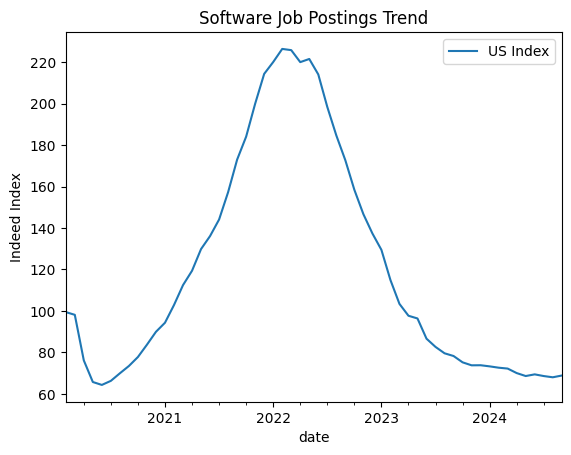

In [ ]:
df_software = sectors_postings.loc[sectors_postings['display_name'] == 'Software Development']
df_software = df_software.drop(columns=['display_name'])
monthly_software = df_software.resample('ME', on='date').mean()
monthly_software.plot(title='Software Job Postings Trend', ylabel='Indeed Index')
plt.legend(["US Index"])
plt.show()

In [ ]:
ndxt = pd.read_csv('NDXT 2019-2024.csv', parse_dates=['Date'])
ndxt.head()

,Date,Close/Last,Open,High,Low
0,2024-05-24,10549.22,10494.50,10616.85,10480.60
1,2024-05-23,10495.82,10698.18,10704.39,10444.49
2,2024-05-22,10568.80,10566.26,10595.30,10489.32
3,2024-05-21,10507.10,10454.12,10515.10,10437.74
4,2024-05-20,10554.51,10432.06,10568.81,10424.56


In [ ]:
ndxt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1259 non-null   datetime64[ns]
 1   Close/Last  1259 non-null   float64       
 2   Open        1259 non-null   float64       
 3   High        1259 non-null   float64       
 4   Low         1259 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 49.3 KB


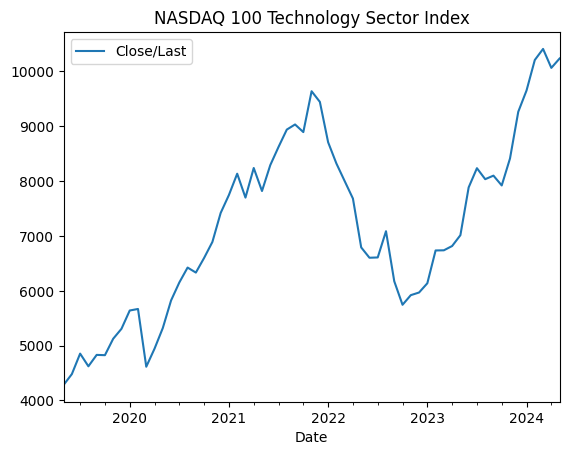

In [ ]:
monthly_ndxt = ndxt.resample('ME', on='Date').mean()
monthly_ndxt.plot(title='NASDAQ 100 Technology Sector Index', y='Close/Last')
plt.show()

In [ ]:
profits = pd.read_csv('BEA Corporate Profits.csv')
profits.head()

,Industry,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1
0,Corporate profits with inventory valuation adj...,3198.2,3468.5,3541.4,3498.8,3502.8,3513.6,3620.1,3760.7,---
1,Domestic industries,2775.5,2990.0,3051.1,2998.9,3010.8,2999.5,3097.2,3246.7,---
2,Financial,615.9,602.7,610.8,564.8,591.7,537.0,546.1,552.6,---
3,Federal Reserve banks,135.3,122.2,33.4,-69.7,-125.0,-159.8,-164.4,-126.0,---
4,Other financial2,480.6,480.5,577.5,634.5,716.7,696.7,710.5,678.6,---


In [ ]:
profits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Industry  25 non-null     object 
 1   2022Q1    25 non-null     float64
 2   2022Q2    25 non-null     float64
 3   2022Q3    25 non-null     float64
 4   2022Q4    25 non-null     float64
 5   2023Q1    25 non-null     float64
 6   2023Q2    25 non-null     float64
 7   2023Q3    25 non-null     float64
 8   2023Q4    25 non-null     float64
 9   2024Q1    25 non-null     object 
dtypes: float64(8), object(2)
memory usage: 2.1+ KB


In [ ]:
formated_profits = profits.melt(id_vars=['Industry'], var_name='Date', value_name="Billions of dollars")
formated_profits = formated_profits[pd.to_numeric(formated_profits['Billions of dollars'], errors='coerce').notnull()]
formated_profits['Billions of dollars'] = formated_profits['Billions of dollars'].astype(float)
formated_profits.head()

,Industry,Date,Billions of dollars
0,Corporate profits with inventory valuation adj...,2022Q1,3198.2
1,Domestic industries,2022Q1,2775.5
2,Financial,2022Q1,615.9
3,Federal Reserve banks,2022Q1,135.3
4,Other financial2,2022Q1,480.6


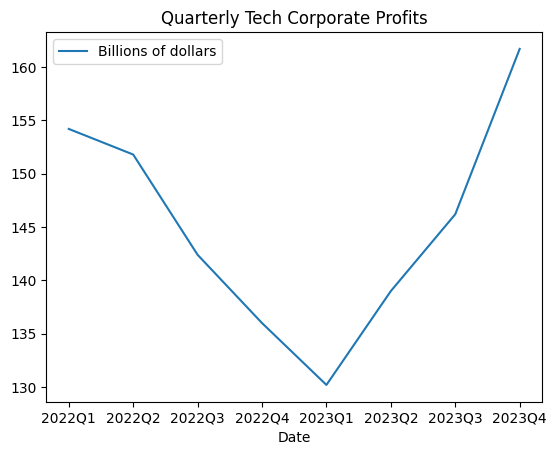

In [ ]:
tech_profits = formated_profits.query("Industry=='Computer and electronic products'")

tech_profits.plot(title='Quarterly Tech Corporate Profits', x='Date')
plt.show()

In [ ]:
gdp = pd.read_csv('world_gdp_data.csv', encoding='latin1')
gdp.head()

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Annual GDP growth (percent change),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.2,2.6,1.2,3.9,-2.4,-20.7,NaN,NaN,NaN
1,Albania,Annual GDP growth (percent change),2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,...,2.2,3.3,3.8,4.0,2.1,-3.3,8.9,4.8,3.6,3.3
2,Algeria,Annual GDP growth (percent change),-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,...,3.7,3.2,1.4,1.2,1.0,-5.1,3.4,3.2,3.8,3.1
3,Andorra,Annual GDP growth (percent change),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4,3.7,0.3,1.6,2.0,-11.2,8.3,8.8,2.1,1.5
4,Angola,Annual GDP growth (percent change),2.4,-4.4,0.0,4.2,6.0,3.5,2.9,4.1,...,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.2,3.0,1.3,3.3


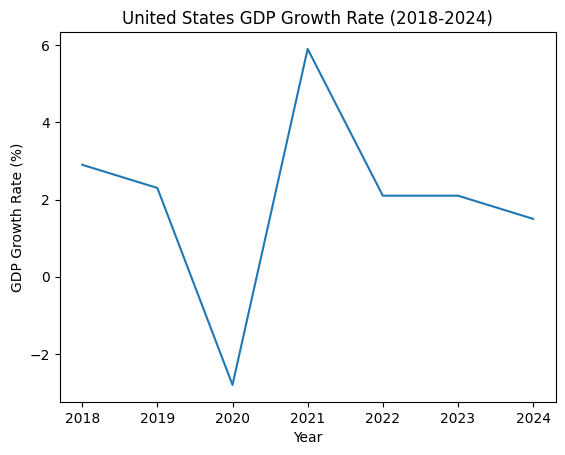

In [ ]:
us_data = gdp[gdp['country_name'] == 'United States']

us_data_2018_2024 = us_data[['2018', '2019', '2020', '2021', '2022', '2023', '2024']]


plt.plot(us_data_2018_2024.values[0])
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.title('United States GDP Growth Rate (2018-2024)')

years = ['2018', '2019', '2020', '2021', '2022', '2023', '2024']
plt.xticks(range(len(years)), years)

plt.show()